In [1]:
#https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
import os
import numpy as np

# Keras partial weight loading info:
# https://stackoverflow.com/questions/43702323/how-to-load-only-specific-weights-on-keras

ct_folder = 'all2'
cancer_folder = 'cancer'

In [2]:
# https://luna16.grand-challenge.org/Data/
ct_dataset = os.listdir(ct_folder)
cancer_dataset = os.listdir(cancer_folder)

In [4]:
ct_set = set(ct_dataset) # get set of all ct images
malignant_set = set(cancer_dataset) # get ct images containing cancer (call it malignant)
benign_set = ct_set - malignant_set # make list of benign nodules

# check all correct
print("All scans count: {}, malignant: {}, union: {}, intersection: {}".format(
      len(ct_set), len(malignant_set), len(ct_set | malignant_set), len(ct_set & malignant_set)))

All scans count: 9711, malignant: 4838, union: 9711, intersection: 4838


In [5]:
# load data 
data_x = np.ndarray((0,16,64,64))
data_y = np.ndarray((0, 1))
for benign in benign_set: #go through benign examples
    valarr = benign.split('_')
    if (valarr[1] == "img"):
        data = np.load(os.path.join(ct_folder, benign))
        data_x = np.append(data_x, [data], axis = 0)
        data_y = np.append(data_y, [0]) # no cancer
        

for malignant in malignant_set: #go through malignant examples
    valarr = malignant.split('_')
    if (valarr[1] == "img"):
        data = np.load(os.path.join(cancer_folder, malignant))
        data_x = np.append(data_x, [data], axis = 0)
        data_y = np.append(data_y, [1]) # presented cancer
        


In [13]:
#overall: 4855 images
N = data_y.shape[0]
# benign count
Nb = np.sum(data_y == 0)
# malignant count
Nm = np.sum(data_y == 1)
print("{} benign, {} malignant, {} overall".format(Nb, Nm, N))

2436 benign, 2419 malignant, 4855 overall


In [25]:
# plotting function:
# https://www.kaggle.com/arnavkj95/candidate-generation-and-luna16-preprocessing


import matplotlib.pyplot as plt
from skimage import measure, feature
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def plot_ct_scan(scan):
    f, plots = plt.subplots(int(scan.shape[0] / 4), 4, figsize=(25, 25))
    for i in range(0, scan.shape[0], 4):
        for j in range (0, scan.shape[0], 4):
            plots[int(i / 4), int(j / 4)].axis('off')
            plots[int(i / 4), int(j / 4)].imshow(scan[i + int(j/4)], cmap=plt.cm.bone) 

def plot_3d(image, threshold=-300):
    
    # Position the scan upright, 
    # so the head of the patient would be at the top facing the camera
    p = image.transpose(2,1,0)
    p = p[:,:,::-1]
    
    verts, faces = measure.marching_cubes_classic(p, threshold)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Fancy indexing: `verts[faces]` to generate a collection of triangles
    mesh = Poly3DCollection(verts[faces], alpha=0.1)
    face_color = [0.5, 0.5, 1]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)

    ax.set_xlim(0, p.shape[0])
    ax.set_ylim(0, p.shape[1])
    ax.set_zlim(0, p.shape[2])

    plt.show()

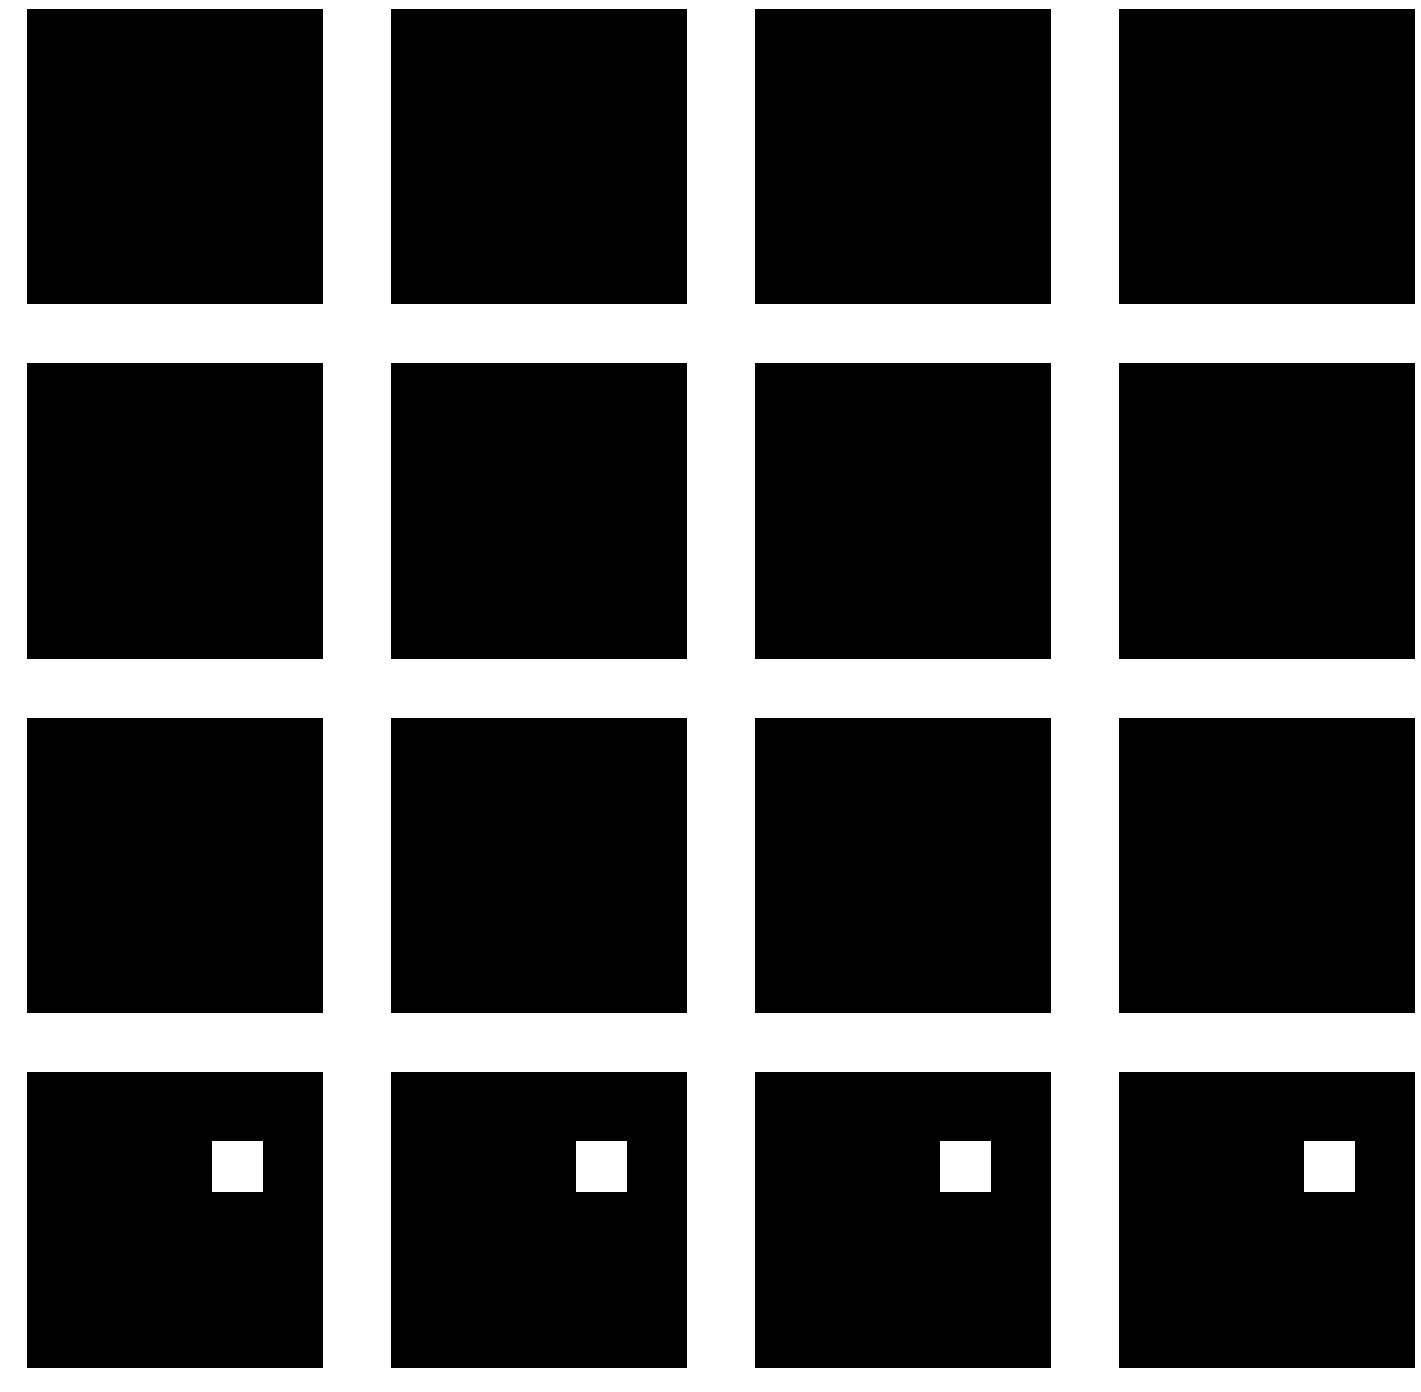

In [26]:
plot_ct_scan(data)

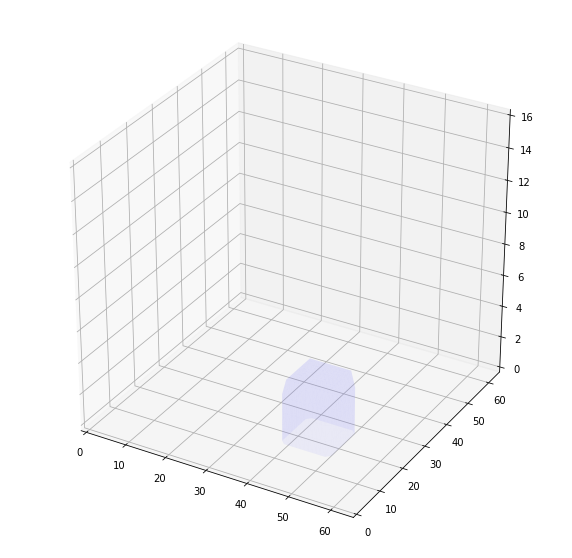

In [28]:
plot_3d(data, 0)